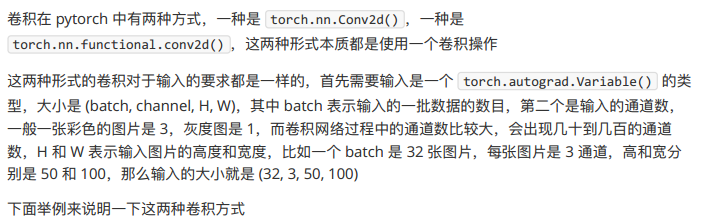

In [1]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
im = Image.open('gray_image.jpg').convert('L')
im = np.array(im, dtype='float32')

In [31]:
im.shape

(248, 248)

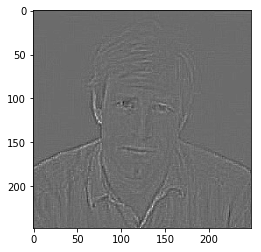

In [33]:
plt.imshow(im.astype('uint8'), cmap='gray')

In [34]:
#将图片矩阵转化为pytorch tensor，并适配卷积输入的要求
im = torch.from_numpy(im.reshape((1, 1, im.shape[0], im.shape[1])))

In [35]:
im.shape

torch.Size([1, 1, 248, 248])

In [36]:
conv1 = nn.Conv2d(1, 1, 3, bias=False)
sobel_kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],dtype='float32')
sobel_kernel=sobel_kernel.reshape((1,1,3,3))
conv1.weight.data=torch.from_numpy(sobel_kernel)

In [37]:
conv1.weight.data.shape

torch.Size([1, 1, 3, 3])

In [38]:
edge1 = conv1(Variable(im))

In [39]:
edg1 = edge1.data.squeeze().numpy()

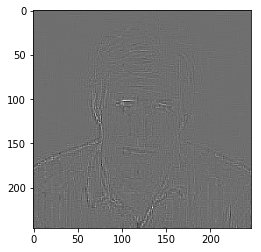

In [40]:
plt.imshow(edg1, cmap=  'gray')
#plt.imsave('gray_image.jpg',edg1)

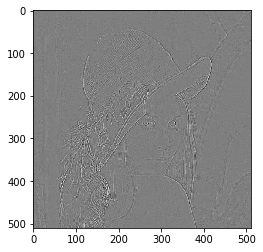

In [20]:
#使用F.conv2d
sobel_kernel = np.array([[-1,-1,-1], [-1,8,-1],[-1,-1,-1]],dtype='float32')
sobel_kernel = sobel_kernel.reshape((1, 1, 3, 3))
weight = Variable(torch.from_numpy(sobel_kernel))
edg2 = F.conv2d(Variable(im), weight)
edg2 = edg2.data.squeeze().numpy()
plt.imshow(edg2, cmap = 'gray')

## 池化层
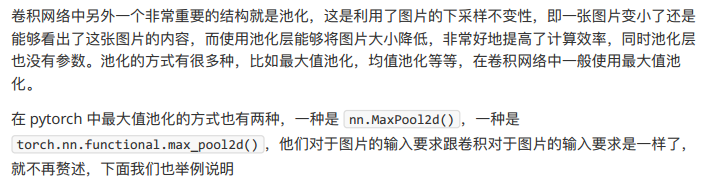
一般使用max_pool

In [41]:
pool1 = nn.MaxPool2d(2, 2)
print('before max pool, image shape:{} × {}'.format(im.shape[2], im.shape[3]))
small_im1 = pool1(Variable(im))
small_im1 = small_im1.data.squeeze().numpy()
print('after max pool, image shape: {} × {}'.format(small_im1.shape[0],small_im1.shape[1]))

before max pool, image shape:248 × 248
after max pool, image shape: 124 × 124


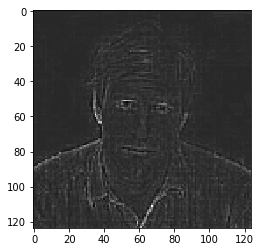

In [42]:
plt.imshow(small_im1, cmap='gray')

In [30]:
#使用F.max_pool2d
print('before max pool, image shape:{} × {}'.format(im.shape[2], im.shape[3]))
small_im2 = F.max_pool2d(Variable(im), 2, 2)
small_im2 = small_im2.data.squeeze().numpy()
print('after max pool, image shape:{} × {}'.format(small_im2.shape[0],small_im2.shape[1]))

before max pool, image shape:512 × 512
after max pool, image shape:256 × 256


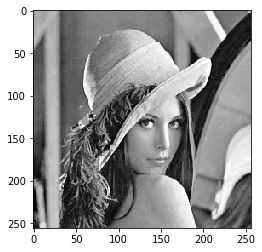

In [31]:
plt.imshow(small_im2, cmap='gray')